In [1]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import patches as patches
%matplotlib inline

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import simpsom  as sps
from pylettes import *
pylette = Tundra(reverse=True).cmap
from simpsom.plots import scatter_on_map

In [2]:
df = pd.read_csv("../../data/data.csv")
df

,Delivery_person_deliveries,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Road_traffic_density,Vehicle_condition,multiple_deliveries,...,Type_of_order_Buffet,Type_of_order_Drinks,Type_of_order_Meal,Type_of_order_Snack,Type_of_vehicle_electric_scooter,Type_of_vehicle_motorcycle,Type_of_vehicle_scooter,City_Metropolitian,City_Semi-Urban,City_Urban
0,62,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2.0,2,0.0,...,0,0,0,1,0,1,0,0,0,1
1,56,34.0,4.5,12.913041,77.683237,13.043041,77.813237,3.0,2,1.0,...,0,0,0,1,0,0,1,1,0,0
2,54,37.0,4.4,12.913041,77.683237,12.953041,77.723237,2.0,0,2.0,...,1,0,0,0,0,1,0,1,0,0
3,62,28.0,4.9,17.431477,78.400350,17.451477,78.420350,0.0,1,1.0,...,0,0,1,0,0,0,1,0,0,1
4,60,37.0,4.6,23.359407,85.325055,23.429407,85.395055,0.0,0,1.0,...,0,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37191,63,39.0,4.7,12.323978,76.627961,12.333978,76.637961,0.0,1,0.0,...,1,0,0,0,0,0,1,1,0,0
37192,58,35.0,4.3,13.026286,80.275235,13.136286,80.385235,0.0,0,2.0,...,0,0,1,0,0,1,0,1,0,0
37193,8,34.0,4.9,27.163303,78.057044,27.213303,78.107044,1.0,2,0.0,...,0,0,0,1,0,0,1,1,0,0
37194,45,20.0,4.8,18.593481,73.785901,18.653481,73.845901,1.0,1,1.0,...,0,1,0,0,0,1,0,1,0,0


# SOMs

In [3]:
# !pip install --upgrade simpsom==3.0.0b0

In [4]:
df = df[:10000]

In [5]:
df = df.drop(["Restaurant_latitude", "Restaurant_longitude", "Delivery_location_latitude", "Delivery_location_longitude"], axis=1)
df

,Delivery_person_deliveries,Delivery_person_Age,Delivery_person_Ratings,Road_traffic_density,Vehicle_condition,multiple_deliveries,Festival,Time_taken (min),Distance,Time_to_pick,...,Type_of_order_Buffet,Type_of_order_Drinks,Type_of_order_Meal,Type_of_order_Snack,Type_of_vehicle_electric_scooter,Type_of_vehicle_motorcycle,Type_of_vehicle_scooter,City_Metropolitian,City_Semi-Urban,City_Urban
0,62,37.0,4.9,2.0,2,0.0,0.0,9.0,3.020737,15.0,...,0,0,0,1,0,1,0,0,0,1
1,56,34.0,4.5,3.0,2,1.0,0.0,28.0,20.143737,5.0,...,0,0,0,1,0,0,1,1,0,0
2,54,37.0,4.4,2.0,0,2.0,0.0,37.0,6.198608,5.0,...,1,0,0,0,0,1,0,1,0,0
3,62,28.0,4.9,0.0,1,1.0,0.0,4.0,3.068178,15.0,...,0,0,1,0,0,0,1,0,0,1
4,60,37.0,4.6,0.0,0,1.0,0.0,15.0,10.550013,10.0,...,0,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,58,32.0,4.8,0.0,2,0.0,0.0,11.0,1.549502,5.0,...,0,1,0,0,0,0,1,1,0,0
9996,56,35.0,4.9,0.0,2,1.0,0.0,11.0,8.927789,5.0,...,0,1,0,0,0,0,1,1,0,0
9997,62,36.0,4.7,0.0,0,1.0,0.0,19.0,7.670149,5.0,...,0,0,1,0,0,1,0,0,0,1
9998,54,35.0,4.2,1.0,2,1.0,0.0,23.0,16.635255,10.0,...,1,0,0,0,1,0,0,1,0,0


In [6]:
df_w_dummies = df
df_w_dummies

,Delivery_person_deliveries,Delivery_person_Age,Delivery_person_Ratings,Road_traffic_density,Vehicle_condition,multiple_deliveries,Festival,Time_taken (min),Distance,Time_to_pick,...,Type_of_order_Buffet,Type_of_order_Drinks,Type_of_order_Meal,Type_of_order_Snack,Type_of_vehicle_electric_scooter,Type_of_vehicle_motorcycle,Type_of_vehicle_scooter,City_Metropolitian,City_Semi-Urban,City_Urban
0,62,37.0,4.9,2.0,2,0.0,0.0,9.0,3.020737,15.0,...,0,0,0,1,0,1,0,0,0,1
1,56,34.0,4.5,3.0,2,1.0,0.0,28.0,20.143737,5.0,...,0,0,0,1,0,0,1,1,0,0
2,54,37.0,4.4,2.0,0,2.0,0.0,37.0,6.198608,5.0,...,1,0,0,0,0,1,0,1,0,0
3,62,28.0,4.9,0.0,1,1.0,0.0,4.0,3.068178,15.0,...,0,0,1,0,0,0,1,0,0,1
4,60,37.0,4.6,0.0,0,1.0,0.0,15.0,10.550013,10.0,...,0,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,58,32.0,4.8,0.0,2,0.0,0.0,11.0,1.549502,5.0,...,0,1,0,0,0,0,1,1,0,0
9996,56,35.0,4.9,0.0,2,1.0,0.0,11.0,8.927789,5.0,...,0,1,0,0,0,0,1,1,0,0
9997,62,36.0,4.7,0.0,0,1.0,0.0,19.0,7.670149,5.0,...,0,0,1,0,0,1,0,0,0,1
9998,54,35.0,4.2,1.0,2,1.0,0.0,23.0,16.635255,10.0,...,1,0,0,0,1,0,0,1,0,0


In [7]:
temp = df.describe()["Delivery_person_deliveries"]
df_temp = pd.cut(
    df["Delivery_person_deliveries"],
    bins=[temp["min"], 15, temp["max"] + 1],
    include_lowest=True,
)
df["Person_Scale"] = df_temp.factorize()[0]
df_temp.value_counts()

(15.0, 68.0]     8620
(4.999, 15.0]    1380
Name: Delivery_person_deliveries, dtype: int64

In [8]:
df_temp.factorize()[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [9]:
temp = df.describe()["Time_taken (min)"]
df_fac = pd.cut(
    df["Time_taken (min)"],
    bins=[temp["min"], temp["25%"], temp["50%"], temp["75%"], temp["max"] + 1],
    include_lowest=True,
)
# df["Time_Scale"] = df_fac
# df["Time_Scale_fac"] = df_fac.factorize()[0]
# df[df["Time_Scale"].isna()]["Time_taken (min)"]

# df_fac.factorize()[0]

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_w_dummies)
scaled_data
scaled_df = pd.DataFrame(scaled_data,columns=df_w_dummies.columns)

In [11]:
scaled_df_v2 = scaled_df.copy()
scaled_df_v2["Time_Scale_fac"] = df_fac.factorize()[0]

In [12]:
net = sps.SOMNet(50, 50, scaled_df_v2.values, topology='hexagonal',
                PBC=True, init='PCA', metric='cosine',
                neighborhood_fun='gaussian',
                random_seed=32, GPU=True)
net.train(epochs=100, start_learning_rate=0.01, batch_size=100)
net.save_map("./trained_som_couriers.npy")

2023-12-15 17:16:26.453 | INFO     | simpsom.network:__init__:106 - Periodic Boundary Conditions active.
2023-12-15 17:16:26.458 | INFO     | simpsom.network:__init__:115 - Hexagonal topology.
2023-12-15 17:16:26.459 | WARNING  | simpsom.network:_set_weights:178 - Please make sure that the data have been standardized before using PCA.
2023-12-15 17:16:26.459 | INFO     | simpsom.network:_set_weights:180 - The weights will be initialized with PCA.
2023-12-15 17:16:27.371 | INFO     | simpsom.network:train:374 - The map will be trained with the batch algorithm.
2023-12-15 17:19:22.378 | INFO     | simpsom.network:save_map:302 - Map shape and weights will be saved to:
././trained_som_couriers.npy


2023-12-15 17:19:22.882 | INFO     | simpsom.network:get_nodes_difference:579 - Weights difference among neighboring nodes calculated.


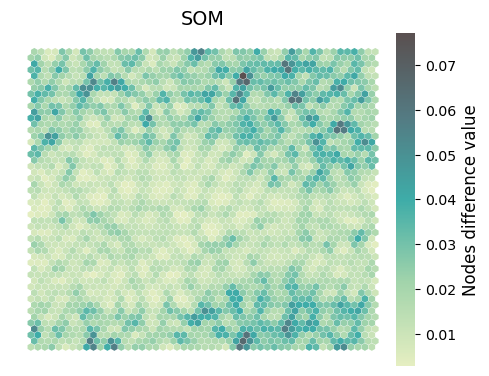

2023-12-15 17:19:26.278 | INFO     | simpsom.network:plot_map_by_difference:751 - Node difference map will be saved to:
././som_difference.png


In [13]:
_ = net.plot_map_by_difference(show=True, print_out=True,
    cmap=pylette)

In [14]:
projection = net.project_onto_map(scaled_df_v2.values)
projection

2023-12-15 17:19:28.186 | INFO     | simpsom.network:project_onto_map:604 - Projected coordinates will be saved to:
././som_projected.npy


array([[36.      ,  0.      ],
       [ 6.5     , 35.507042],
       [34.      , 27.712812],
       ...,
       [29.      , 12.124355],
       [41.5     , 19.918585],
       [21.      , 15.588457]], dtype=float32)

Найти матрицу нодов. По идее фича - это столбец, а ноды - это строки (но это не точно). Где-то должна быть матрица и надо посмотреть че за данные в желтых областях

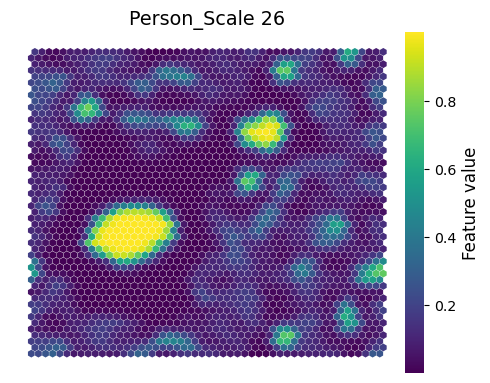

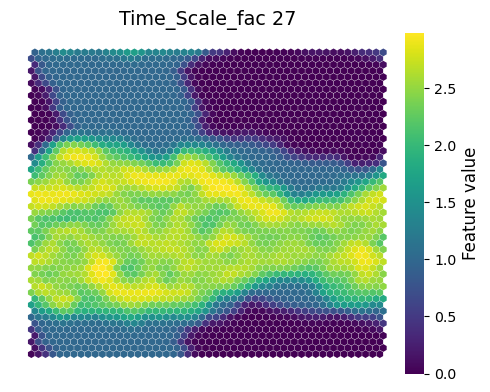

In [60]:
# for i in [0, 7, 26, 27]:
for i in [26, 27]:
  net.plot_map_by_feature(feature_ix=i, show=True, print_out=False, title=scaled_df_v2.columns[i]+' '+str(i))

Нанести метки на эти графики, чтобы понять ,че это за кластеры.

В графике персон можно выделить 2 кластера. Надо понять че это за кластеры.

Попробовать скормить к-меанс тот график с двумя кластерами.

In [57]:
labs, points = net.cluster(scaled_df_v2.values, algorithm='KMeans', n_clusters=3)

2023-12-15 19:21:36.565 | INFO     | simpsom.network:project_onto_map:604 - Projected coordinates will be saved to:
./som_projected_KMeans.npy
2023-12-15 19:21:37.450 | WARNING  | simpsom.network:cluster:638 - PBC are active. Make sure to provide a PBC-compatible custom metric if possible, or use `polygons.distance_pbc`. See the documentation for more detail.
c:\Users\Kirill\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
2023-12-15 19:21:37.531 | INFO     | simpsom.network:cluster:678 - Clustering results will be saved to:
././som_clusters.npy


[36.  34.5 39.  ... 46.5 29.  41.5]
[ 6.5  7.5  5.5 ...  7.   9.5 21. ]
[34.  44.5 24.5 ... 36.  33.  27. ]


2023-12-15 19:21:43.078 | INFO     | simpsom.network:plot_clusters:893 - Clustering plot will be saved to:
././som_clusters.png


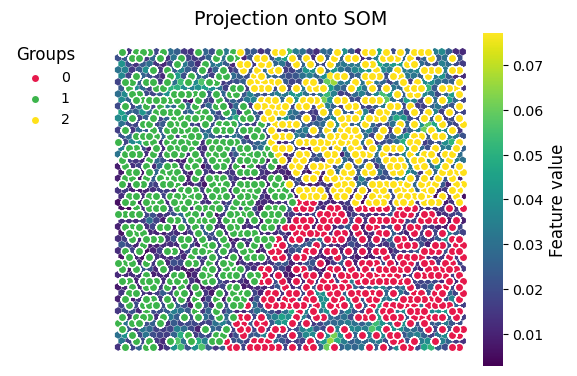

In [58]:
net.plot_clusters(points, labs, color_val=[n.difference for n in net.nodes_list])

In [67]:
net.height

50

In [87]:
nodes_by_weight = np.array([node.weights for node in net.nodes_list if node.weights[26]>0.8])
nodes_by_weight.shape

(79, 28)

In [93]:
df_big_cluster = pd.DataFrame(nodes_by_weight, columns=scaled_df_v2.columns)
df_big_cluster

,Delivery_person_deliveries,Delivery_person_Age,Delivery_person_Ratings,Road_traffic_density,Vehicle_condition,multiple_deliveries,Festival,Time_taken (min),Distance,Time_to_pick,...,Type_of_order_Meal,Type_of_order_Snack,Type_of_vehicle_electric_scooter,Type_of_vehicle_motorcycle,Type_of_vehicle_scooter,City_Metropolitian,City_Semi-Urban,City_Urban,Person_Scale,Time_Scale_fac
0,0.170572,0.538951,0.878529,0.514706,0.754972,0.240955,1.094086e-18,0.349285,0.018789,0.387673,...,2.130171e-10,0.020618,1.130946e-26,0.000217,9.997827e-01,1.000000,0.000000e+00,1.754622e-29,0.931915,2.578271
1,0.170606,0.548587,0.885821,0.481649,0.791044,0.237024,1.746262e-22,0.338892,0.014062,0.364170,...,2.600852e-09,0.073178,4.430790e-25,0.004002,9.959981e-01,1.000000,0.000000e+00,3.026854e-31,0.926677,2.493988
2,0.234884,0.579719,0.887222,0.454900,0.827671,0.239694,9.858216e-27,0.325325,0.007811,0.417334,...,1.128293e-08,0.206500,1.209804e-23,0.039057,9.609427e-01,1.000000,0.000000e+00,1.858061e-33,0.813639,2.381895
3,0.182618,0.548195,0.863555,0.544544,0.764452,0.240249,2.519221e-15,0.341877,0.024837,0.406842,...,1.870562e-09,0.021864,1.566437e-32,0.000180,9.998197e-01,1.000000,0.000000e+00,1.252911e-32,0.901232,2.579734
4,0.135599,0.572405,0.865281,0.538334,0.781104,0.232933,7.215905e-19,0.333803,0.020321,0.349872,...,3.966000e-08,0.083063,4.132449e-31,0.001958,9.980420e-01,1.000000,0.000000e+00,3.835417e-34,0.984443,2.495968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,0.231917,0.406884,0.880854,0.216460,0.412535,0.214313,5.410598e-05,0.106674,0.012351,0.807657,...,4.674369e-03,0.905129,2.895799e-15,1.000000,1.614762e-09,0.999992,1.782385e-07,7.618338e-06,0.847095,0.000214
75,0.179732,0.411977,0.869168,0.387835,0.281090,0.257775,2.930053e-02,0.223429,0.001446,0.609887,...,2.671567e-04,0.011637,3.317464e-14,1.000000,1.768859e-11,0.997444,2.935476e-05,2.526839e-03,0.899070,0.204214
76,0.140035,0.391874,0.891413,0.307086,0.254586,0.222787,6.993594e-03,0.142535,0.002522,0.736573,...,3.704553e-04,0.105281,1.569278e-14,1.000000,1.194303e-09,0.999382,2.641754e-06,6.151283e-04,0.964563,0.045463
77,0.158847,0.430942,0.897676,0.284272,0.290357,0.213530,6.901128e-04,0.111432,0.006613,0.820857,...,3.861317e-04,0.426177,3.718339e-15,1.000000,3.282527e-08,0.999939,2.239150e-07,6.089767e-05,0.940734,0.004415


In [97]:
df_big_cluster.describe()

,Delivery_person_deliveries,Delivery_person_Age,Delivery_person_Ratings,Road_traffic_density,Vehicle_condition,multiple_deliveries,Festival,Time_taken (min),Distance,Time_to_pick,...,Type_of_order_Meal,Type_of_order_Snack,Type_of_vehicle_electric_scooter,Type_of_vehicle_motorcycle,Type_of_vehicle_scooter,City_Metropolitian,City_Semi-Urban,City_Urban,Person_Scale,Time_Scale_fac
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,7.900000e+01,79.000000,79.000000,79.000000,...,7.900000e+01,7.900000e+01,7.900000e+01,79.000000,7.900000e+01,79.000000,7.900000e+01,7.900000e+01,79.000000,79.000000
mean,0.153589,0.530694,0.862447,0.434498,0.404453,0.240107,9.055687e-03,0.312500,0.019075,0.475133,...,2.217917e-01,2.934191e-01,1.911528e-15,0.750266,2.497335e-01,0.998598,3.699990e-04,1.031615e-03,0.948976,2.061280
std,0.038533,0.066498,0.019508,0.094584,0.212246,0.024070,3.119711e-02,0.075082,0.017288,0.156936,...,3.291216e-01,3.550643e-01,1.143463e-14,0.381972,3.819717e-01,0.005020,1.805596e-03,3.760419e-03,0.058407,0.969974
min,0.118048,0.385631,0.815486,0.216460,0.113855,0.179439,0.000000e+00,0.102895,0.000931,0.221980,...,2.130171e-10,1.057860e-07,0.000000e+00,0.000180,5.192385e-21,0.970990,0.000000e+00,0.000000e+00,0.804888,0.000166
25%,0.123679,0.486767,0.849667,0.368121,0.239743,0.230639,4.962948e-32,0.322526,0.003105,0.357660,...,2.102477e-04,7.399972e-03,0.000000e+00,0.497404,2.418284e-08,1.000000,0.000000e+00,2.967360e-34,0.909317,2.369591
50%,0.133894,0.545536,0.863989,0.446230,0.350737,0.238515,3.623548e-26,0.336679,0.016280,0.462387,...,1.073339e-02,1.052811e-01,0.000000e+00,0.998049,1.951196e-03,1.000000,3.896746e-34,2.991065e-26,0.979403,2.488899
75%,0.178898,0.579692,0.877974,0.514119,0.547260,0.246563,3.043008e-16,0.349455,0.026187,0.566665,...,4.078306e-01,5.326446e-01,4.542928e-28,1.000000,5.025955e-01,1.000000,1.014900e-25,1.148370e-15,0.997509,2.599501
max,0.261717,0.637031,0.897676,0.587871,0.827671,0.358468,1.713996e-01,0.454493,0.071002,0.839031,...,9.899846e-01,9.986057e-01,9.548925e-14,1.000000,9.998197e-01,1.000000,1.477259e-02,2.066119e-02,0.999994,2.738852


In [109]:
from IPython.display import display

def find_bool_cols(df):
    temp_df_max = pd.DataFrame(df.max())
    cols_max = temp_df_max[temp_df_max == 1].dropna().T.columns
    temp_df_min = pd.DataFrame(df.min())
    cols_min = temp_df_min[temp_df_min == 0].dropna().T.columns
    return cols_min.intersection(cols_max)

def display_clusters(df, cluser_count):
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    rows = []
    try:
        for cl in df["Cluster" + str(cluser_count)].unique():
            rows.append(df[df["Cluster" + str(cluser_count)] == cl].mean())
    except TypeError as e:
        raise TypeError(
            f"Dataframe has no column named {'Cluster' + str(cluser_count)}"
        ) from e

    df_cluster_means = pd.DataFrame(rows)
    df_cluster_means = df_cluster_means[
        df_cluster_means.columns.drop(list(df.filter(regex=r"Cluster\d+")))
    ]

    # display(pd.DataFrame(df_cluster_means.std().sort_values(ascending=False)).T)
    # display(pd.DataFrame(df_cluster_means.mean().sort_values(ascending=False)).T)

    temp_mean = df_cluster_means.mean()
    cols = pd.DataFrame(temp_mean).T.columns.intersection(find_bool_cols(df))
    temp_mean[cols] = 1

    df_std = (
        pd.DataFrame(df_cluster_means.std() / temp_mean)
        .sort_values(by=[0], ascending=False)
        .T
    )
    display(df_std)
    display(df_cluster_means[df_std.columns])
    
    pd.options.display.max_columns = 10
    pd.options.display.max_rows = 10

In [105]:
df_big_cluster = df_big_cluster.drop("Cluster1", axis=1)

In [114]:
df_std = (
    pd.DataFrame(df_big_cluster.std())
    .sort_values(by=[0], ascending=True)
    .T
)
display(df_std)
display(df_big_cluster[df_std.columns])

,Type_of_vehicle_electric_scooter,City_Semi-Urban,City_Urban,City_Metropolitian,Distance,Delivery_person_Ratings,multiple_deliveries,Festival,Delivery_person_deliveries,Person_Scale,Delivery_person_Age,Time_taken (min),Road_traffic_density,Weather conditions_Cloudy,Weather conditions_Stormy,Time_to_pick,Weather conditions_Sandstorms,Weather conditions_Fog,Weather conditions_Sunny,Vehicle_condition,Weather conditions_Windy,Type_of_order_Buffet,Type_of_order_Meal,Type_of_order_Snack,Type_of_order_Drinks,Type_of_vehicle_scooter,Type_of_vehicle_motorcycle,Time_Scale_fac
0,1.143463e-14,0.001806,0.00376,0.00502,0.017288,0.019508,0.02407,0.031197,0.038533,0.058407,0.066498,0.075082,0.094584,0.099194,0.116688,0.156936,0.17487,0.177024,0.187914,0.212246,0.232822,0.319622,0.329122,0.355064,0.374005,0.381972,0.381972,0.969974


,Type_of_vehicle_electric_scooter,City_Semi-Urban,City_Urban,City_Metropolitian,Distance,Delivery_person_Ratings,multiple_deliveries,Festival,Delivery_person_deliveries,Person_Scale,Delivery_person_Age,Time_taken (min),Road_traffic_density,Weather conditions_Cloudy,Weather conditions_Stormy,Time_to_pick,Weather conditions_Sandstorms,Weather conditions_Fog,Weather conditions_Sunny,Vehicle_condition,Weather conditions_Windy,Type_of_order_Buffet,Type_of_order_Meal,Type_of_order_Snack,Type_of_order_Drinks,Type_of_vehicle_scooter,Type_of_vehicle_motorcycle,Time_Scale_fac
0,1.130946e-26,0.000000e+00,1.754622e-29,1.000000,0.018789,0.878529,0.240955,1.094086e-18,0.170572,0.931915,0.538951,0.349285,0.514706,0.206396,0.068002,0.387673,0.272033,0.166772,0.212807,0.754972,0.073990,0.965687,2.130171e-10,0.020618,0.013695,9.997827e-01,0.000217,2.578271
1,4.430790e-25,0.000000e+00,3.026854e-31,1.000000,0.014062,0.885821,0.237024,1.746262e-22,0.170606,0.926677,0.548587,0.338892,0.481649,0.158507,0.050344,0.364170,0.200680,0.037569,0.175859,0.791044,0.377041,0.922130,2.600852e-09,0.073178,0.004692,9.959981e-01,0.004002,2.493988
2,1.209804e-23,0.000000e+00,1.858061e-33,1.000000,0.007811,0.887222,0.239694,9.858216e-27,0.234884,0.813639,0.579719,0.325325,0.454900,0.052953,0.013901,0.417334,0.052371,0.003873,0.058581,0.827671,0.818321,0.792584,1.128293e-08,0.206500,0.000916,9.609427e-01,0.039057,2.381895
3,1.566437e-32,0.000000e+00,1.252911e-32,1.000000,0.024837,0.863555,0.240249,2.519221e-15,0.182618,0.901232,0.548195,0.341877,0.544544,0.128075,0.035943,0.406842,0.142417,0.318427,0.297540,0.764452,0.077598,0.714356,1.870562e-09,0.021864,0.263779,9.998197e-01,0.000180,2.579734
4,4.132449e-31,0.000000e+00,3.835417e-34,1.000000,0.020321,0.865281,0.232933,7.215905e-19,0.135599,0.984443,0.572405,0.333803,0.538334,0.150938,0.045304,0.349872,0.182962,0.101819,0.437514,0.781104,0.081464,0.802412,3.966000e-08,0.083063,0.114524,9.980420e-01,0.001958,2.495968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,2.895799e-15,1.782385e-07,7.618338e-06,0.999992,0.012351,0.880854,0.214313,5.410598e-05,0.231917,0.847095,0.406884,0.106674,0.216460,0.148337,0.172743,0.807657,0.206575,0.038893,0.133847,0.412535,0.299606,0.089632,4.674369e-03,0.905129,0.000565,1.614762e-09,1.000000,0.000214
75,3.317464e-14,2.935476e-05,2.526839e-03,0.997444,0.001446,0.869168,0.257775,2.930053e-02,0.179732,0.899070,0.411977,0.223429,0.387835,0.133316,0.100903,0.609887,0.103639,0.073272,0.024333,0.281090,0.564537,0.987466,2.671567e-04,0.011637,0.000630,1.768859e-11,1.000000,0.204214
76,1.569278e-14,2.641754e-06,6.151283e-04,0.999382,0.002522,0.891413,0.222787,6.993594e-03,0.140035,0.964563,0.391874,0.142535,0.307086,0.224438,0.159192,0.736573,0.168942,0.045822,0.124665,0.254586,0.276942,0.893723,3.704553e-04,0.105281,0.000626,1.194303e-09,1.000000,0.045463
77,3.718339e-15,2.239150e-07,6.089767e-05,0.999939,0.006613,0.897676,0.213530,6.901128e-04,0.158847,0.940734,0.430942,0.111432,0.284272,0.198649,0.161554,0.820857,0.128393,0.026314,0.315917,0.290357,0.169174,0.573127,3.861317e-04,0.426177,0.000309,3.282527e-08,1.000000,0.004415


In [117]:
temp_mean = df_big_cluster.mean()
cols = pd.DataFrame(temp_mean).T.columns.intersection(find_bool_cols(df))
temp_mean[cols] = 1

df_std = (
    pd.DataFrame(df_big_cluster.std() / temp_mean)
    .sort_values(by=[0], ascending=True)
    .T
)
display(df_std)
display(df_big_cluster[df_std.columns])

,Type_of_vehicle_electric_scooter,City_Semi-Urban,City_Urban,City_Metropolitian,Delivery_person_Ratings,Festival,Person_Scale,Weather conditions_Cloudy,multiple_deliveries,Weather conditions_Stormy,Delivery_person_Age,Weather conditions_Sandstorms,Weather conditions_Fog,Weather conditions_Sunny,Road_traffic_density,Weather conditions_Windy,Time_taken (min),Delivery_person_deliveries,Type_of_order_Buffet,Type_of_order_Meal,Time_to_pick,Type_of_order_Snack,Type_of_order_Drinks,Type_of_vehicle_scooter,Type_of_vehicle_motorcycle,Time_Scale_fac,Vehicle_condition,Distance
0,1.143463e-14,0.001806,0.00376,0.00502,0.02262,0.031197,0.058407,0.099194,0.100247,0.116688,0.125304,0.17487,0.177024,0.187914,0.217686,0.232822,0.240263,0.250886,0.319622,0.329122,0.3303,0.355064,0.374005,0.381972,0.381972,0.470569,0.524773,0.906281


,Type_of_vehicle_electric_scooter,City_Semi-Urban,City_Urban,City_Metropolitian,Delivery_person_Ratings,Festival,Person_Scale,Weather conditions_Cloudy,multiple_deliveries,Weather conditions_Stormy,Delivery_person_Age,Weather conditions_Sandstorms,Weather conditions_Fog,Weather conditions_Sunny,Road_traffic_density,Weather conditions_Windy,Time_taken (min),Delivery_person_deliveries,Type_of_order_Buffet,Type_of_order_Meal,Time_to_pick,Type_of_order_Snack,Type_of_order_Drinks,Type_of_vehicle_scooter,Type_of_vehicle_motorcycle,Time_Scale_fac,Vehicle_condition,Distance
0,1.130946e-26,0.000000e+00,1.754622e-29,1.000000,0.878529,1.094086e-18,0.931915,0.206396,0.240955,0.068002,0.538951,0.272033,0.166772,0.212807,0.514706,0.073990,0.349285,0.170572,0.965687,2.130171e-10,0.387673,0.020618,0.013695,9.997827e-01,0.000217,2.578271,0.754972,0.018789
1,4.430790e-25,0.000000e+00,3.026854e-31,1.000000,0.885821,1.746262e-22,0.926677,0.158507,0.237024,0.050344,0.548587,0.200680,0.037569,0.175859,0.481649,0.377041,0.338892,0.170606,0.922130,2.600852e-09,0.364170,0.073178,0.004692,9.959981e-01,0.004002,2.493988,0.791044,0.014062
2,1.209804e-23,0.000000e+00,1.858061e-33,1.000000,0.887222,9.858216e-27,0.813639,0.052953,0.239694,0.013901,0.579719,0.052371,0.003873,0.058581,0.454900,0.818321,0.325325,0.234884,0.792584,1.128293e-08,0.417334,0.206500,0.000916,9.609427e-01,0.039057,2.381895,0.827671,0.007811
3,1.566437e-32,0.000000e+00,1.252911e-32,1.000000,0.863555,2.519221e-15,0.901232,0.128075,0.240249,0.035943,0.548195,0.142417,0.318427,0.297540,0.544544,0.077598,0.341877,0.182618,0.714356,1.870562e-09,0.406842,0.021864,0.263779,9.998197e-01,0.000180,2.579734,0.764452,0.024837
4,4.132449e-31,0.000000e+00,3.835417e-34,1.000000,0.865281,7.215905e-19,0.984443,0.150938,0.232933,0.045304,0.572405,0.182962,0.101819,0.437514,0.538334,0.081464,0.333803,0.135599,0.802412,3.966000e-08,0.349872,0.083063,0.114524,9.980420e-01,0.001958,2.495968,0.781104,0.020321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,2.895799e-15,1.782385e-07,7.618338e-06,0.999992,0.880854,5.410598e-05,0.847095,0.148337,0.214313,0.172743,0.406884,0.206575,0.038893,0.133847,0.216460,0.299606,0.106674,0.231917,0.089632,4.674369e-03,0.807657,0.905129,0.000565,1.614762e-09,1.000000,0.000214,0.412535,0.012351
75,3.317464e-14,2.935476e-05,2.526839e-03,0.997444,0.869168,2.930053e-02,0.899070,0.133316,0.257775,0.100903,0.411977,0.103639,0.073272,0.024333,0.387835,0.564537,0.223429,0.179732,0.987466,2.671567e-04,0.609887,0.011637,0.000630,1.768859e-11,1.000000,0.204214,0.281090,0.001446
76,1.569278e-14,2.641754e-06,6.151283e-04,0.999382,0.891413,6.993594e-03,0.964563,0.224438,0.222787,0.159192,0.391874,0.168942,0.045822,0.124665,0.307086,0.276942,0.142535,0.140035,0.893723,3.704553e-04,0.736573,0.105281,0.000626,1.194303e-09,1.000000,0.045463,0.254586,0.002522
77,3.718339e-15,2.239150e-07,6.089767e-05,0.999939,0.897676,6.901128e-04,0.940734,0.198649,0.213530,0.161554,0.430942,0.128393,0.026314,0.315917,0.284272,0.169174,0.111432,0.158847,0.573127,3.861317e-04,0.820857,0.426177,0.000309,3.282527e-08,1.000000,0.004415,0.290357,0.006613
